<a href="https://colab.research.google.com/github/Sardaar2003/GFG_Data_Science_Course_Assignment/blob/main/T_Distributed_Stocastic_Neighbor_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('bank_note_data.csv')
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data['Class'].unique()

array([0, 1])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
feature=list(data.columns)[:-1]
target=list(data.columns)[-1]

## Scaling the Data

In [9]:
from sklearn.preprocessing import StandardScaler
data1=data.copy()
sc=StandardScaler()
data1[feature]=sc.fit_transform(data1[feature])

In [10]:
data1.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


## TSNE

In [11]:
from sklearn.manifold import TSNE

tsne=TSNE(learning_rate=500,n_components=2)
x_tsne=tsne.fit_transform(data1[feature])

In [12]:
y=data1[target]

## Visualisation

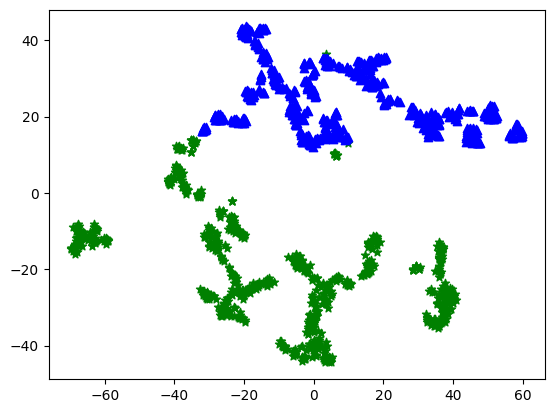

In [16]:
plt.scatter(x_tsne[np.where(y==0),0],x_tsne[np.where(y==0),1],color='g',marker='*')
plt.scatter(x_tsne[np.where(y==1),0],x_tsne[np.where(y==1),1],color='b',marker='^')

In [13]:
x_tsne[np.where(y==0)]

array([[-28.493004 , -27.080688 ],
       [-26.30679  , -30.578669 ],
       [ 36.623745 , -30.180672 ],
       ...,
       [-36.91006  ,   1.5527602],
       [  3.3155077, -40.550827 ],
       [  0.382373 , -29.637712 ]], dtype=float32)

In [14]:
x_tsne[np.where(y==1)]

array([[-9.011928 , 27.717293 ],
       [ 4.3089542, 14.720919 ],
       [39.708042 , 20.88598  ],
       ...,
       [59.827206 , 15.357785 ],
       [51.825462 , 19.377888 ],
       [17.83504  , 34.259968 ]], dtype=float32)